In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [45]:
df = pd.read_pickle('final.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179946 entries, 0 to 179945
Data columns (total 47 columns):
FIRE_YEAR                           179946 non-null int64
DISCOVERY_DOY                       179946 non-null int64
DISCOVERY_TIME                      105049 non-null float64
STAT_CAUSE_CODE                     179946 non-null float64
STAT_CAUSE_DESCR                    179946 non-null object
CONT_DOY                            89828 non-null float64
CONT_TIME                           89139 non-null float64
FIRE_SIZE                           179946 non-null float64
FIRE_SIZE_CLASS                     179946 non-null object
LATITUDE                            179946 non-null float64
LONGITUDE                           179946 non-null float64
STATE                               179946 non-null object
COUNTY                              53413 non-null object
Closest_stations                    179946 non-null object
Station Id                          179946 non-null object
Da

In [46]:
Y = Y = df['FIRE_SIZE_CLASS']
df = df[['LATITUDE', 'LONGITUDE', 'Solar Radiation Average', 'Average Soil Temperature', 'Average Air Temperature', 
        'Average Vapor Pressure', 'Average Wind Speed', 'Precipitation', 'Average Relative Humidity']]
df = df.convert_objects(convert_numeric=True)
df.head()

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


,LATITUDE,LONGITUDE,Solar Radiation Average,Average Soil Temperature,Average Air Temperature,Average Vapor Pressure,Average Wind Speed,Precipitation,Average Relative Humidity
0,40.036944,-121.005833,177.0,34.6,22.3,3.8,2.6,0.0,94.0
1,38.933056,-120.404444,699.0,66.5,57.1,7.0,5.1,0.0,44.0
2,38.696111,-120.398611,699.0,66.5,57.1,7.0,5.1,0.0,44.0
3,38.325833,-120.230556,699.0,66.5,57.1,7.0,5.1,0.0,44.0
4,38.984167,-120.735556,676.0,73.2,70.9,10.4,5.6,0.0,40.0


In [47]:
df = df.dropna()

In [48]:
X = df[['LATITUDE', 'LONGITUDE', 'Solar Radiation Average', 'Average Soil Temperature', 'Average Air Temperature', 
        'Average Vapor Pressure', 'Average Wind Speed', 'Precipitation', 'Average Relative Humidity']]
X = X.apply(pd.to_numeric)

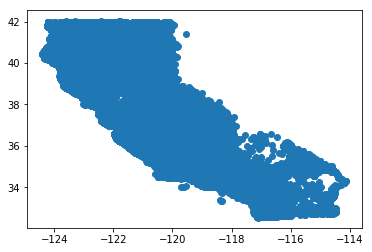

In [6]:
from sklearn.preprocessing import scale
X = scale(X)
plt.scatter(df["LONGITUDE"], df["LATITUDE"])

In [7]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.33, random_state=42)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(Xtrain)
pca_2d = pca.transform(Xtrain)

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


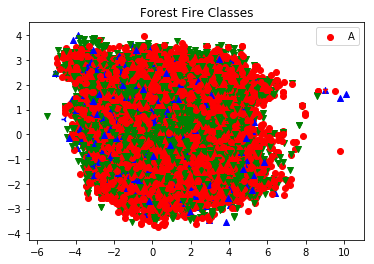

In [17]:
for i in tqdm(range(0, pca_2d.shape[0])):
    if ytrain1['FIRE_SIZE_CLASS'][i] == 'A':
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    marker='o')
    elif ytrain1['FIRE_SIZE_CLASS'][i] == 'B':
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    marker='v')
    elif ytrain1['FIRE_SIZE_CLASS'][i] == 'C':
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    marker='^')
    elif ytrain1['FIRE_SIZE_CLASS'][i] == 'D':
        c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='c',    marker='1')
    elif ytrain1['FIRE_SIZE_CLASS'][i] == 'E':
        c5 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='m',    marker='2')
    elif ytrain1['FIRE_SIZE_CLASS'][i] == 'F':
        c6 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y',    marker='3')
    elif ytrain1['FIRE_SIZE_CLASS'][i] == 'G':
        c7 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='k',    marker='4')
plt.legend([c1, c2, c3, c4, c5, c6, c7, c8], ['A', 'B','C','D','E','F','G'])
plt.title('Forest Fire Classes')
plt.show()

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


NameError: name 'c8' is not defined

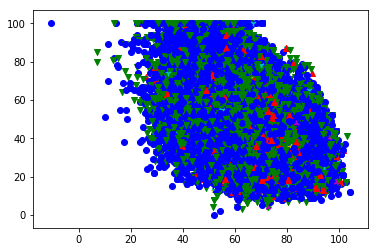

In [54]:
for i in tqdm(range(len(Y))):
    try: 
        if Y[i] == 'A':
            c1 = plt.scatter(df['Average Air Temperature'][i], df['Average Relative Humidity'][i], c='b', marker='o')
        elif Y[i] == 'B':
            c2 = plt.scatter(df['Average Air Temperature'][i], df['Average Relative Humidity'][i], c='g', marker='v')
        elif Y[i] == 'C':
            c3 = plt.scatter(df['Average Air Temperature'][i], df['Average Relative Humidity'][i], c='r', marker='^')
        elif Y[i] == 'D':
            c4 = plt.scatter(df['Average Air Temperature'][i], df['Average Relative Humidity'][i], c='c', marker='1')
        elif Y[i] == 'E':
            c5 = plt.scatter(df['Average Air Temperature'][i], df['Average Relative Humidity'][i], c='m', marker='2')
        elif Y[i] == 'F':
            c6 = plt.scatter(df['Average Air Temperature'][i], df['Average Relative Humidity'][i], c='y', marker='3')
        elif Y[i] == 'G':
            c7 = plt.scatter(df['Average Air Temperature'][i], df['Average Relative Humidity'][i], c='k', marker='4')
    except:
        continue
plt.legend([c1, c2, c3, c4, c5, c6, c7], ['A', 'B','C','D','E','F','G'])
plt.title('Forest Fire Classes')
plt.show()


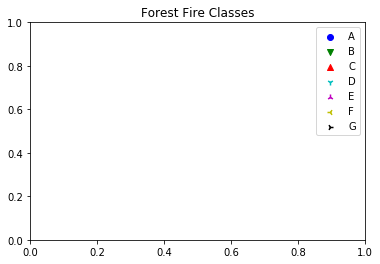

In [55]:
plt.legend([c1, c2, c3, c4, c5, c6, c7], ['A', 'B','C','D','E','F','G'])
plt.title('Forest Fire Classes')
plt.show()

In [ ]:
model = SVC(gamma='scale', decision_function_shape='ovo', C=50, random_state=42, kernel='poly', verbose=True)
model.fit(Xtrain, ytrain)

In [23]:
preds = model.predict(Xtest)
acc = accuracy_score(ytest, preds)
acc

0.5645256229598844

In [24]:
preds

array(['B', 'A', 'B', ..., 'A', 'A', 'A'], dtype=object)

In [25]:
ytest

108361    A
15187     B
85137     B
33637     B
69868     A
96427     B
114461    B
112533    B
104943    A
134268    A
63932     A
158718    A
65206     A
83652     A
117594    B
71825     A
19369     B
31727     A
68276     A
122382    B
87770     B
170163    A
49881     A
109215    A
170828    A
66137     B
64484     B
157149    B
9053      A
40537     A
         ..
137254    B
109411    B
91319     B
24483     A
94674     B
88152     C
149736    B
42131     B
74629     B
29736     A
172612    D
43829     A
40929     A
63237     B
57349     A
145257    A
71064     A
109268    B
45166     A
61804     A
27308     B
61969     B
54281     F
52837     B
171041    B
10692     A
79810     B
33882     B
350       A
127679    B
Name: FIRE_SIZE_CLASS, Length: 56063, dtype: object

In [15]:
ytrain1 = ytrain.reset_index()

In [16]:
ytrain1 = ytrain1.drop('index', axis=1)

In [36]:
ytrain1['FIRE_SIZE_CLASS'][0]

'A'

In [19]:
pca_2d[0]

array([ 0.35761918, -1.4731081 ])